# This project is an analysis of a mobile gadgets and accessories store.



The activities are going to work on are as follows;

1. Data cleaning
2. Data sorting
3. Find best selling product.
4. Find city with best sales performance.
5. Find the peak time for orders.
6. Find products that were bought together most as a pair of 2 and 3.

Let's start the project.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import relevant python modules for the analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

In [4]:
#merge 12 months data into 1 data file for analysis and read into jupyter notebooks

file = './drive/My Drive/MLstart/mobile/All Sales Data.csv'
df = pd.read_csv(file)
print(df.head(2))

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1   176559  Bose SoundSport Headphones                1      99.99   

       Order Date                   Purchase Address  
0  4/19/2019 8:46       917 1st St, Dallas, TX 75001  
1  4/7/2019 22:30  682 Chestnut St, Boston, MA 02215  


#### Now let's perform some simple exploratory data analysis to further understand the data

In [5]:
# data preview

df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
# check the shape of the data

df.shape

(185687, 6)

In [7]:
# data types

df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
# do we have missing values?

df.isna().values.any()

False

In [9]:
# do we have duplicates?

df.duplicated().values.any()

False

#### Now we have to clean up the data to remove NAN values & duplicates and convert data types

In [10]:
# drop missing values

df.dropna(how='all', inplace= True)

In [11]:
# drop all duplicates

df = df.drop_duplicates()

In [12]:
# check

df.isna().values.any()

False

In [13]:
# check

df.duplicated().values.any()

False

In [14]:
df.shape

(185687, 6)

In [15]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [16]:
df.drop(index=516, inplace=True)

In [17]:
#let's change relevant columns to the correct data types

df[['Quantity Ordered', 'Price Each']] = df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric)

In [18]:
# check to see if it worked
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Next, we have to augment the data by adding relevant extra columns

In [19]:
df['Total'] = df['Quantity Ordered'] * df['Price Each']

In [20]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99


In [21]:
df.reset_index(drop=True, inplace = True)

In [22]:
df.shape

(185686, 7)

In [23]:
df['Month'] = df['Order Date'].str[0:1].apply(pd.to_numeric)

In [24]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4


In [25]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Total               float64
Month                 int64
dtype: object

In [26]:
def city(address):
    return address.split(",")[1]
    
def state(address):
    return address.split(",")[2].split(" ")[1]

def zipcode(address):
    return address.split(",")[2].split(" ")[3]
    
df['City'] = df['Purchase Address'].apply(lambda x: city(x) + ', ' + state(x))

In [27]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,4,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,"Boston, MA"


In [28]:
df.groupby('Product').count()['Quantity Ordered'].sort_values(ascending=False)

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [29]:
# How many unique products are there?

df['Product'].nunique()

19

In [30]:
df_viz = df.groupby('Product').count()['Quantity Ordered'].sort_values()

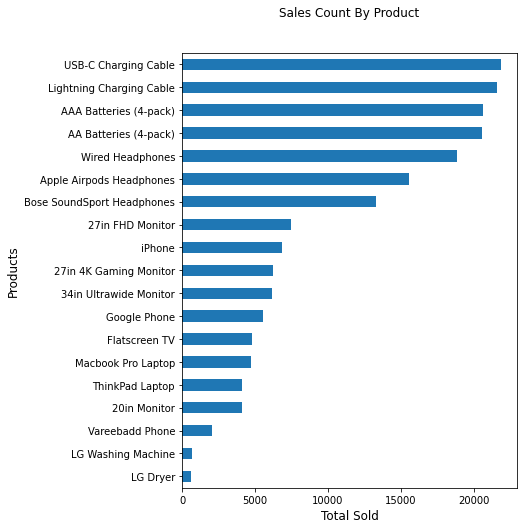

In [31]:
# Best selling product by volume
fig, ax = plt.subplots(figsize=(6,8))
df_viz.plot(kind = 'barh',ax= ax)
ax.set(title = 'Sales Count By Product')
ax.title.set(y=1.07)
ax.set_xlabel('Total Sold',size=12)
ax.set_ylabel('Products',size=12)
plt.show()

In [32]:
# Best selling product by revenue

df.groupby('Product').sum()['Total'].sort_values(ascending=False)

Product
Macbook Pro Laptop            8032500.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3317400.00
27in 4K Gaming Monitor        2433147.61
34in Ultrawide Monitor        2352898.08
Apple Airpods Headphones      2345550.00
Flatscreen TV                 1443900.00
Bose SoundSport Headphones    1342865.70
27in FHD Monitor              1131074.59
Vareebadd Phone                827200.00
20in Monitor                   453818.74
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       346376.55
USB-C Charging Cable           285975.45
Wired Headphones               246082.76
AA Batteries (4-pack)          106041.60
AAA Batteries (4-pack)          92648.14
Name: Total, dtype: float64

In [33]:
salesByProduct = df.groupby('Product').sum()['Total'].sort_values()

In [34]:
df['Total'] = df['Quantity Ordered'] * df['Price Each']

In [35]:
df.reset_index(drop=True, inplace = True)

In [36]:
df.shape

(185686, 9)

In [37]:
df['Month'] = df['Order Date'].str[0:1].apply(pd.to_numeric)

In [38]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,4,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,"Boston, MA"


In [39]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Total               float64
Month                 int64
City                 object
dtype: object

In [40]:
def city(address):
    return address.split(",")[1]
    
def state(address):
    return address.split(",")[2].split(" ")[1]

def zipcode(address):
    return address.split(",")[2].split(" ")[3]
    
df['City'] = df['Purchase Address'].apply(lambda x: city(x) + ', ' + state(x))

In [41]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,4,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,"Boston, MA"


In [42]:
df.groupby('Product').count()['Quantity Ordered'].sort_values(ascending=False)

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [43]:
# How many unique products are there?

df['Product'].nunique()

19

In [44]:
df_viz = df.groupby('Product').count()['Quantity Ordered'].sort_values()

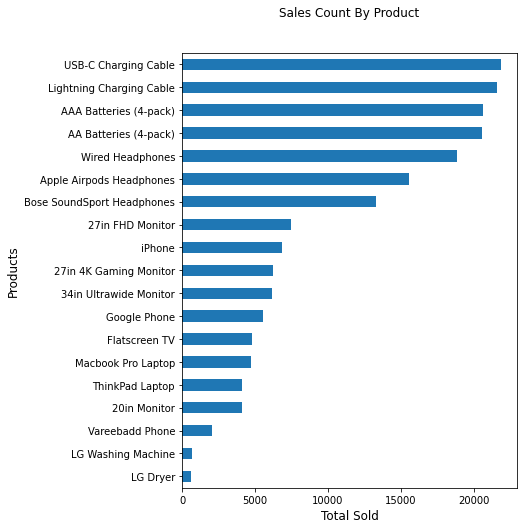

In [45]:
# Best selling product by volume
fig, ax = plt.subplots(figsize=(6,8))
df_viz.plot(kind = 'barh',ax= ax)
ax.set(title = 'Sales Count By Product')
ax.title.set(y=1.07)
ax.set_xlabel('Total Sold',size=12)
ax.set_ylabel('Products',size=12)
plt.show()

In [46]:
# Best selling product by revenue

df.groupby('Product').sum()['Total'].sort_values(ascending=False)

Product
Macbook Pro Laptop            8032500.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3317400.00
27in 4K Gaming Monitor        2433147.61
34in Ultrawide Monitor        2352898.08
Apple Airpods Headphones      2345550.00
Flatscreen TV                 1443900.00
Bose SoundSport Headphones    1342865.70
27in FHD Monitor              1131074.59
Vareebadd Phone                827200.00
20in Monitor                   453818.74
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       346376.55
USB-C Charging Cable           285975.45
Wired Headphones               246082.76
AA Batteries (4-pack)          106041.60
AAA Batteries (4-pack)          92648.14
Name: Total, dtype: float64

In [50]:
salesByProduct = df.groupby('Product').sum()['Total'].sort_values()

In [54]:
from matplotlib.ticker import FuncFormatter

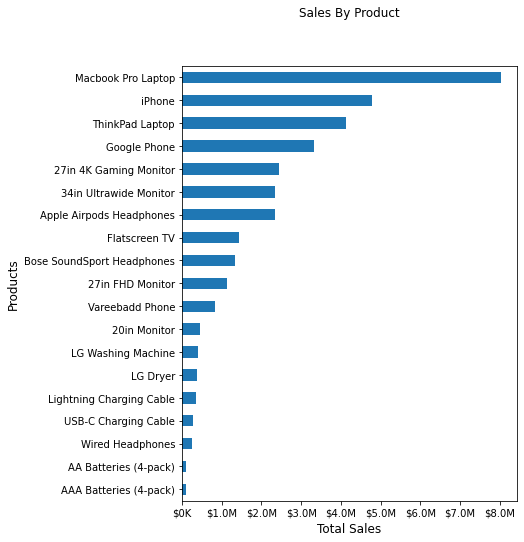

In [55]:
fig, ax = plt.subplots(figsize=(6,8))
salesByProduct.plot(kind = 'barh', ax=ax)
ax.set(title= 'Sales By Product')
ax.title.set(y=1.10)
ax.set_xlabel('Total Sales', size=12)
ax.set_ylabel('Products', size=12)
ax.ticklabel_format(useOffset=False,style='plain',axis='x')
labels = ax.get_xticklabels()

# define a function to convert scientific notation to shorter value
def totalsales(x, pos):
    if x >=1e6:
        s = '${:1.1f}M'.format(x*1e-6) 
    else:
        s = '${:1.0f}K'.format(x*1e-3) 
    return s
formatter = FuncFormatter(totalsales)

ax.xaxis.set_major_formatter(formatter)
plt.setp(labels, rotation =0)
plt.show()

In [56]:
# City with the highest sales
df.groupby('City').sum()['Total'].round()

City
 Atlanta, GA          2794199.0
 Austin, TX           1818044.0
 Boston, MA           3658628.0
 Dallas, TX           2765374.0
 Los Angeles, CA      5448304.0
 New York City, NY    4661867.0
 Portland, ME          449321.0
 Portland, OR         1870011.0
 San Francisco, CA    8254744.0
 Seattle, WA          2745046.0
Name: Total, dtype: float64

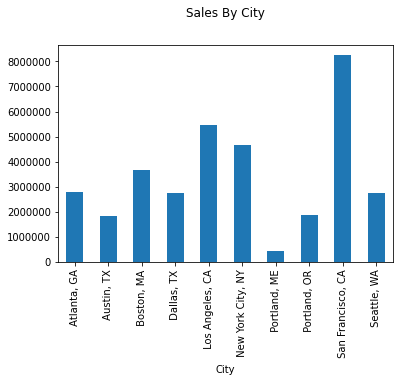

In [58]:
citysales = df.groupby('City').sum()['Total'].round()
fig, ax = plt.subplots(figsize=(6,4))
citysales.plot(kind='bar', ax=ax)
ax.set(title= 'Sales By City')
ax.title.set(y=1.10)
ax.ticklabel_format(useOffset=False,style='plain',axis='y')
labels = ax.get_xticklabels()
plt.show()

In [59]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [60]:
# Now we have converted the order date column to datetime data type
df.dtypes


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Total                      float64
Month                        int64
City                        object
dtype: object

In [61]:
# Let's see the dataframe again
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,"Boston, MA"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,"Los Angeles, CA"


In [62]:
# Augment relevant columns to have hours and minutes element

df['Daytime Hour'] = df['Order Date'].dt.hour
df['Daytime Minute'] = df['Order Date'].dt.minute
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,City,Daytime Hour,Daytime Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,"Los Angeles, CA",14,38


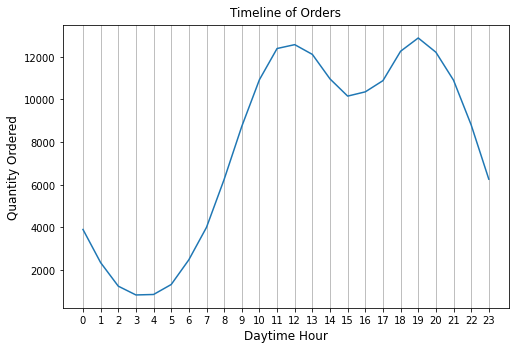

In [63]:
# Let's visualize what times the orders came in on average.

fig, ax = plt.subplots(figsize=(8,5.2))
df.groupby('Daytime Hour').count()['Quantity Ordered'].plot()
ax.set(title = 'Timeline of Orders')
ax.title.set(y=1.01)
ax.set_xlabel('Daytime Hour', size=12)
ax.set_ylabel('Quantity Ordered', size=12)
labels = df['Daytime Hour'].unique()
ax.set_xticks(labels)
ax.grid(axis='x')
plt.show()

In [64]:
# Let's then see which products were ordered together most often
# How do I know that products were ordered together? 
#If you see the dataframe below, you can see that some ORDER ID are repeated for different products. 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,City,Daytime Hour,Daytime Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,"Los Angeles, CA",9,27


In [65]:
# What products were bought together most?

repeated_orders = df[df['Order ID'].duplicated(keep=False)]
repeated_orders['Bought Together'] = repeated_orders.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
#repeated_orders = repeated_orders[['Order ID', 'Bought Together']]
repeated_orders = repeated_orders[['Order ID', 'Bought Together']].drop_duplicates()
repeated_orders.head(10)

,Order ID,Bought Together
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"
136,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
187,176739,"34in Ultrawide Monitor,Google Phone"
223,176774,"Lightning Charging Cable,USB-C Charging Cable"
231,176781,"iPhone,Lightning Charging Cable"
248,176797,"Google Phone,Bose SoundSport Headphones,Wired ..."


In [66]:
# continuation of the operation from last cell

count = Counter()
for row in repeated_orders['Bought Together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for most_common, number_sold in count.most_common(10):
    print(most_common, number_sold)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [67]:
count = Counter()
for row in repeated_orders['Bought Together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
for most_common, number_sold in count.most_common(10):
    print(most_common, number_sold)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [73]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,City,Daytime Hour,Daytime Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,"Los Angeles, CA",9,27


In [78]:
# Create submission DataFrame
df.to_csv("./drive/My Drive/MLstart/mobile/data.csv", index = False)

In [80]:
from google.colab import files

In [81]:
# Create submission csv file csv file
df.to_csv("./drive/My Drive/MLstart/mobile/data.csv", index = False)
files.download('./drive/My Drive/MLstart/mobile/data.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

What can we do with the details of this analysis?

1. We can decide to drop products that are not performing well in volume & revenue.
2. If the company is struggling with runnig cost, store in Portland, ME can be closed.
3. Peak time for orders can help in two ways; for focused advertising & also in terms of staff allocation/rotation.
4. Products bought together can be offered as one package with discount, to drive sales.
5. The Mac Book Pro was the most popular product.
6. While the iPhone & its charger were the pair most frequently purchased.
7. The outlet in San Francisco, CA was the best performing.


Thank you for your time. Your comments, and constructive criticisms (if any) are welcome. 